<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/image_processing_inpainting_project_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA decomposition

we should be able to summarize each wine with fewer characteristics! This is what PCA does.
<br>
 PCA finds the best possible characteristics, the ones that summarize the list of wines as well as only possible (among all conceivable linear combinations). <br>
 As I said before, PCA will find the "best" line according to two different criteria of what is the "best".
 <br>



 - spectral theorem

 <br>



(321, 481, 3)


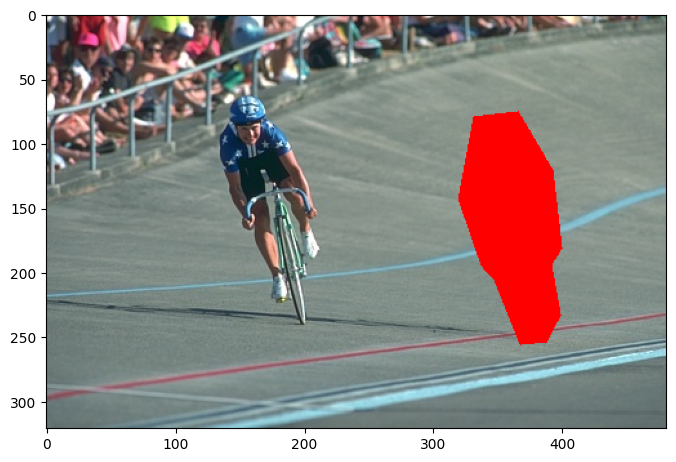

In [ ]:
image_raw = imread("22.png")
print(image_raw.shape)

plt.figure(figsize=[8,8])
plt.imshow(image_raw)

In [ ]:
# Show the new shape of the image
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

# Show the max value at any point.  1.0 = Black, 0.0 = White
image_bw = image_sum/image_sum.max()
print(image_bw.max())

(321, 481)
1.0


Number of components explaining 95% variance: 53


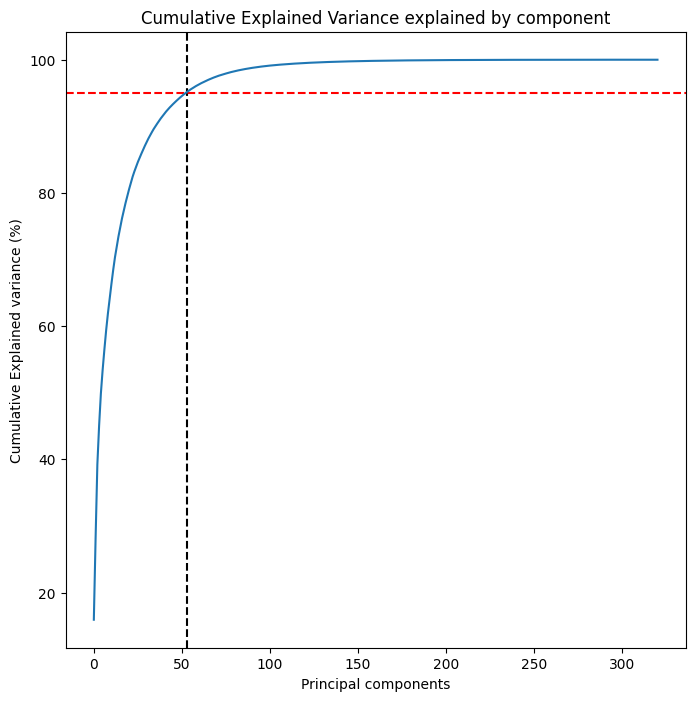

In [ ]:
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[8,8])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [ ]:
len(pca.components_)

321

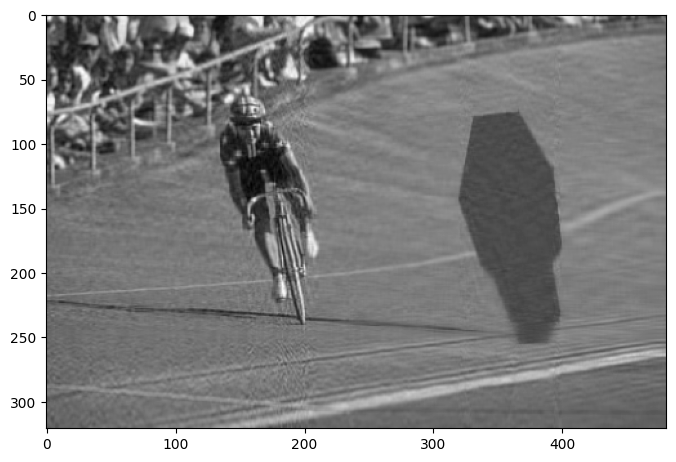

In [ ]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[8,8])
plt.imshow(image_recon,cmap = plt.cm.gray)


We clearly can see the quality of the image has been reduced, but it's still what the image is. From a Machine Learning perspective, training on this reduced set of data can produce nearly as good results but with fewer data.



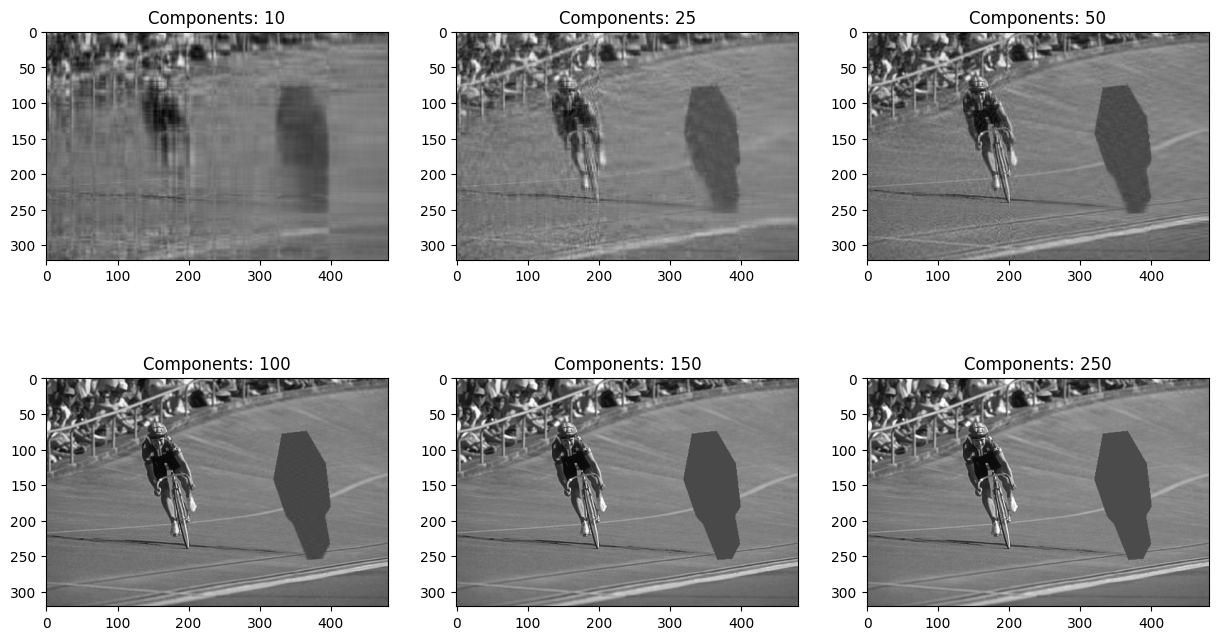

In [ ]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)

ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

Number of components explaining 95% variance: 52
Component 1:
Eigenvector: [ 0.011 -0.002 -0.024 -0.016  0.024  0.044  0.036  0.032  0.046  0.06
  0.064  0.057  0.047  0.035  0.027  0.027  0.033  0.038  0.045  0.052
  0.051  0.037  0.021  0.013  0.016  0.018  0.018  0.014  0.008  0.007
  0.011  0.015  0.016  0.013  0.006  0.018  0.048  0.059  0.042  0.024
  0.027  0.034  0.032  0.027  0.023  0.019  0.014  0.01   0.008  0.006
  0.004  0.006  0.01   0.015  0.015  0.009  0.002 -0.003 -0.004 -0.003
 -0.002 -0.001  0.001  0.009  0.011  0.009  0.017  0.027  0.033  0.026
  0.021  0.018  0.014  0.015  0.02   0.027  0.03   0.029  0.027  0.026
  0.028  0.029  0.027  0.022  0.017  0.012  0.008  0.008  0.01   0.014
  0.017  0.017  0.016  0.017  0.017  0.009 -0.003 -0.01  -0.008 -0.006
 -0.003  0.002  0.004 -0.003 -0.014 -0.024 -0.031 -0.036 -0.041 -0.043
 -0.036 -0.023 -0.01   0.001  0.014  0.023  0.025  0.025  0.023  0.019
  0.019  0.02   0.019  0.021  0.028  0.027  0.018  0.014  0.015  0.021
  0

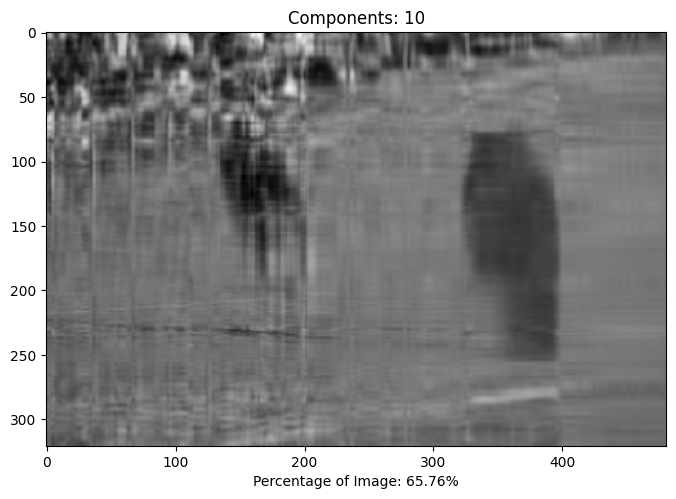

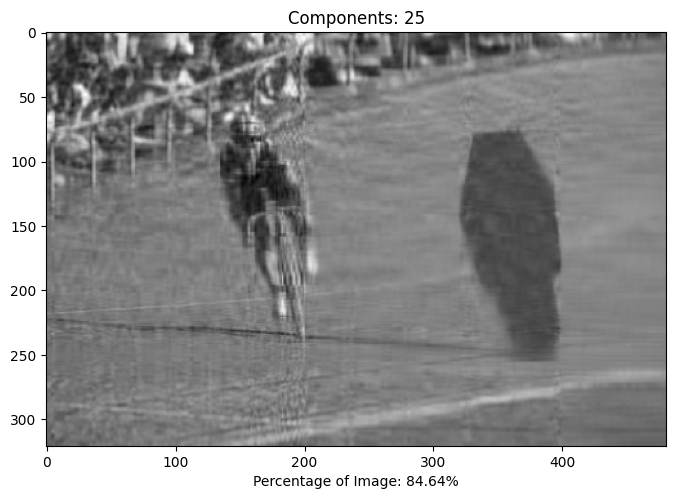

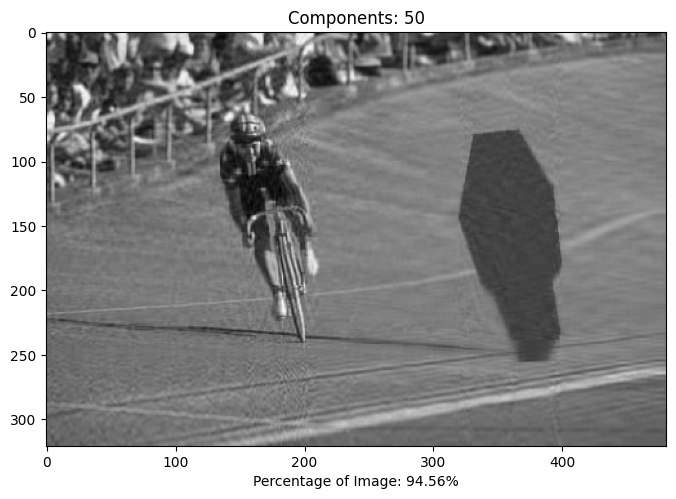

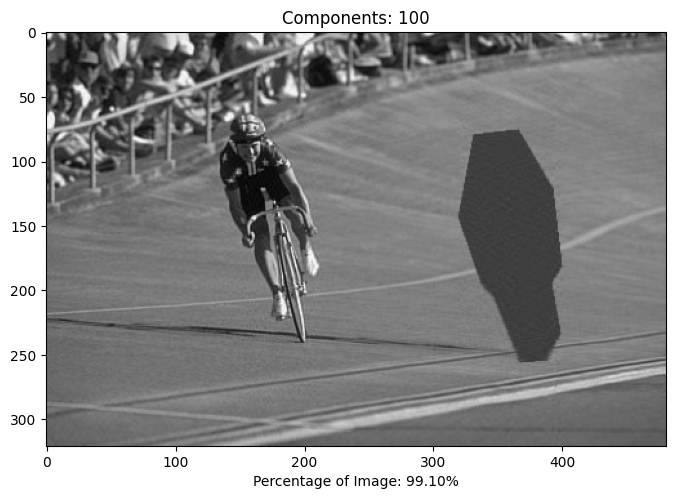

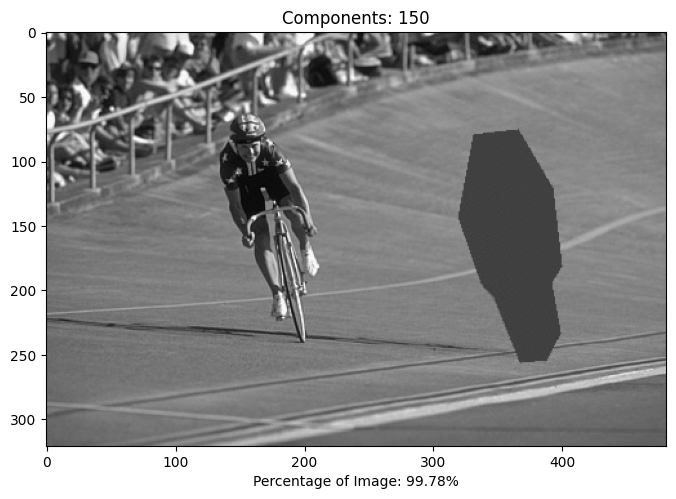

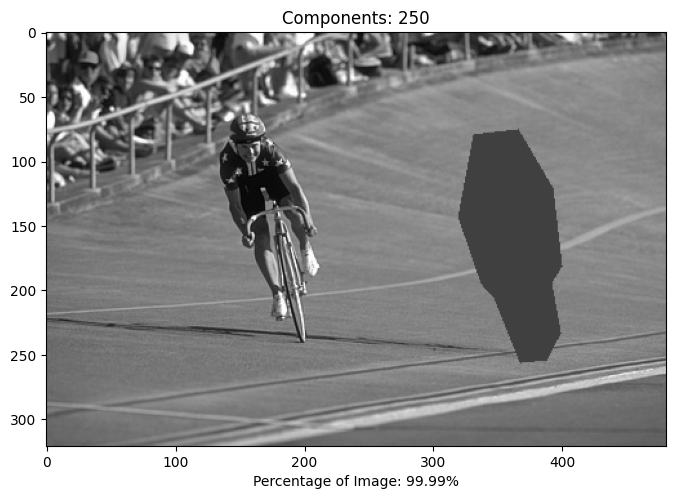

<Figure size 640x480 with 0 Axes>

In [ ]:

# Load the image
image_raw = imread("22.png")

# Convert image to grayscale and normalize
image_gray = np.dot(image_raw[...,:3], [0.2989, 0.5870, 0.1140])  # Convert to grayscale
image_bw = image_gray / 255.0  # Normalize to [0, 1]

# Perform PCA
pca = PCA()
pca.fit(image_bw)

# Cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

# Number of components explaining 95% of the variance
k = np.argmax(var_cumu > 95)
print("Number of components explaining 95% variance: " + str(k))

# Function to calculate percentage of image represented by k components
def percentage_of_image(k):
    return np.sum(pca.explained_variance_ratio_[:k]) * 100

# Function to reconstruct the image with k components
def reconstruct_image(k):
    ipca = IncrementalPCA(n_components=k)
    image_transformed = ipca.fit_transform(image_bw)
    image_recon = ipca.inverse_transform(image_transformed)
    return image_recon

# Display eigenvectors, eigenvalues, and variance for each component
for i in range(k):
    print(f"Component {i+1}:")
    print(f"Eigenvector: {pca.components_[i]}")
    print(f"Eigenvalue: {pca.explained_variance_[i]}")
    print(f"Variance: {pca.explained_variance_[i] / np.sum(pca.explained_variance_)}")
    print("\n")

# Plot reconstructed images for different k values
ks = [10, 25, 50, 100, 150, 250]

for i, k_value in enumerate(ks):
    image_recon = reconstruct_image(k_value)
    plt.figure(figsize=[8, 8])  # Create a new figure for each subplot
    plt.imshow(image_recon, cmap=plt.cm.gray)
    plt.title("Components: " + str(k_value))
    plt.xlabel("Percentage of Image: {:.2f}%".format(percentage_of_image(k_value)))
    plt.show()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

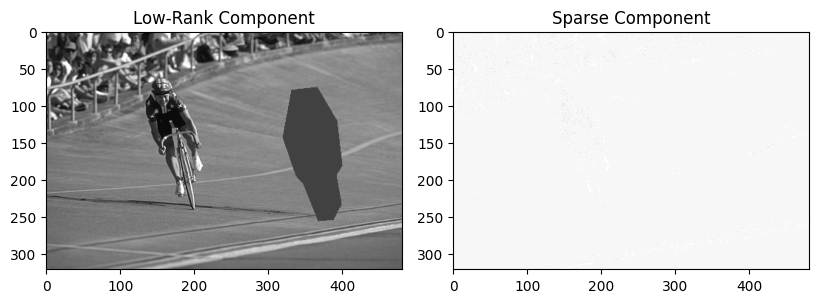

In [ ]:

# Load the image and convert it to grayscale
img = Image.open('22.png').convert('L')

# Convert the image to a numpy array
img_array = np.array(img)

# Flatten the image array
img_array_flat = img_array.flatten().reshape(-1, 1)

# Apply PCA to get the low-rank component
n_components = 1  # You can change the number of components
pca = PCA(n_components=n_components)
low_rank_component = pca.fit_transform(img_array_flat)

# Reshape the low-rank component to the original image shape
low_rank_component = low_rank_component.reshape(img_array.shape)

# Calculate the sparse component
sparse_component = img_array_flat.reshape(img_array.shape) - low_rank_component

# Display the images
plt.figure(figsize=(12, 6))



plt.subplot(1, 3, 2)
plt.imshow(low_rank_component, cmap='gray')
plt.title('Low-Rank Component')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(sparse_component, cmap='gray')
plt.title('Sparse Component')
plt.axis('on')

plt.tight_layout()
plt.show()

[[113 114 117 ...  44  42  41]
 [120 120 123 ...  45  42  41]
 [130 129 131 ...  45  43  41]
 ...
 [ 81  81  75 ...  55  58  59]
 [ 76  78  76 ...  56  61  57]
 [ 71  74  75 ...  56  62  55]]
[[113 114 117 ...  78  78  77]
 [ 75  74  74 ...  91  92  92]
 [ 91  92  93 ... 103 104 102]
 ...
 [143 143 149 ...  36  39  46]
 [ 45  41  38 ...  56  54  53]
 [ 54  51  54 ...  56  62  55]]
SparseCoder(dictionary=array([[-0.438, -0.213, -0.294, ..., -0.464,  0.128, -0.538],
       [ 1.827, -0.338, -0.238, ..., -0.831, -0.695, -0.513],
       [ 0.417, -0.942,  1.016, ...,  0.645,  1.529,  0.097],
       ...,
       [ 0.149,  0.643, -0.28 , ...,  0.805,  0.667, -0.561],
       [ 0.474,  0.379,  2.639, ...,  0.021,  1.146, -1.385],
       [ 0.815, -2.644, -0.759, ..., -0.178,  0.732,  0.568]]),
            transform_algorithm='lasso_lars')
[[-223.635   18.502  -61.704 ...    0.159    0.74     0.411]
 [-209.053 -150.393    8.354 ...   -0.119    0.281   -0.387]
 [-113.691  -49.102    6.834 ...   -0.7

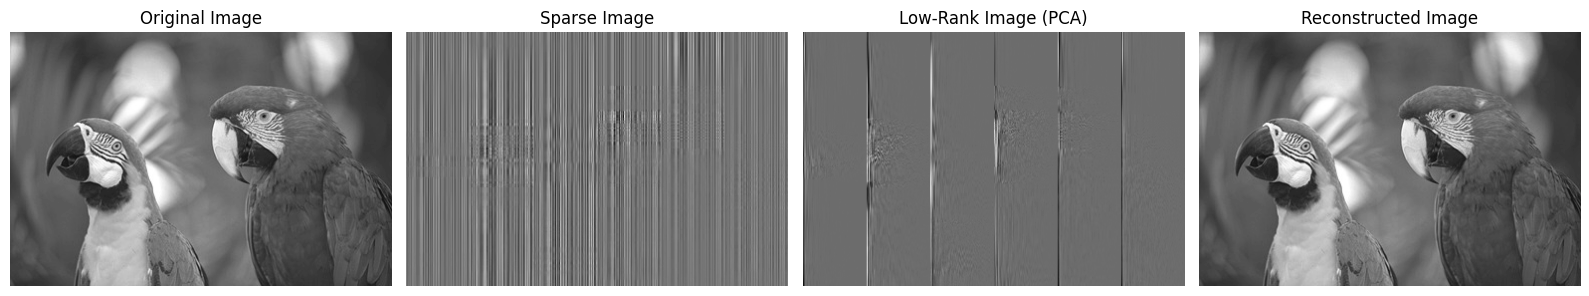

True

In [ ]:


# Load the image and convert it to grayscale
img = Image.open('parrots.jpeg').convert('L')

# Convert the image to a numpy array
img_array = np.array(img)
print(img_array)
# Reshape the image array to have 64 features
img_features = img_array.reshape(-1, 64)
print(img_features)
# Apply Sparse Coding to the image
sparse_coder = SparseCoder(dictionary=np.random.randn(64, 64), transform_algorithm='lasso_lars')
sparse_code = sparse_coder.transform(img_features)

sparse_image = np.dot(sparse_code, np.random.randn(64, 64)).reshape(img_array.shape)
print(sparse_coder)
# Apply PCA decomposition on the image array
pca = PCA(n_components=64)
img_low_rank = pca.fit_transform(img_features)
print(img_low_rank)
img_reconstructed_pca = pca.inverse_transform(img_low_rank).reshape(img_array.shape)

# Display the original image, sparse image, low-rank image, and reconstructed image
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(img_array, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(sparse_image, cmap='gray')
ax[1].set_title('Sparse Image')
ax[1].axis('off')

ax[2].imshow(img_low_rank.reshape(img_array.shape), cmap='gray')
ax[2].set_title('Low-Rank Image (PCA)')
ax[2].axis('off')

ax[3].imshow(img_reconstructed_pca, cmap='gray')
ax[3].set_title('Reconstructed Image')
ax[3].axis('off')

plt.tight_layout()
plt.show()

cv2.imwrite('sparse_image.jpg', sparse_image)
cv2.imwrite('img_low_rank.jpg', img_low_rank)
cv2.imwrite('img_reconstructed_pca.jpg', img_reconstructed_pca)


 a low-rank component that captures the global structure of the image and a sparse component that captures the details or noise in the image. The goal is to visualize the low-rank and sparse components of the image.